In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
digits = fetch_openml(name = "mnist_784", version = 1)


In [17]:
y=digits['target'].astype('uint8')
X=digits.data
data=pd.DataFrame(X)
data['y']=y
data=pd.DataFrame(np.random.permutation(data)[0:10000])
y=data.iloc[:,-1].values.astype('uint8')
X_main=data.drop(784,axis=1).values

In [18]:
pca = PCA(n_components=2)
X=pca.fit_transform(X_main)

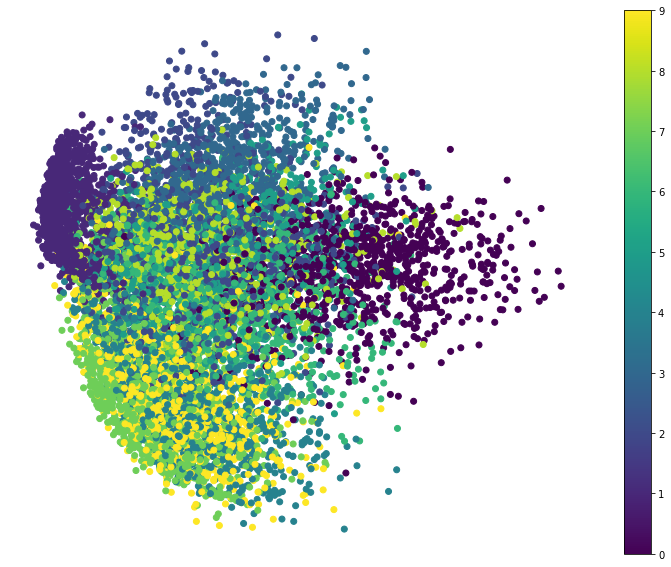

In [19]:
plt.figure(figsize=(13, 10))
plt.scatter(X[:,0],X[:,1],c=y)
plt.axis('off')
plt.colorbar()

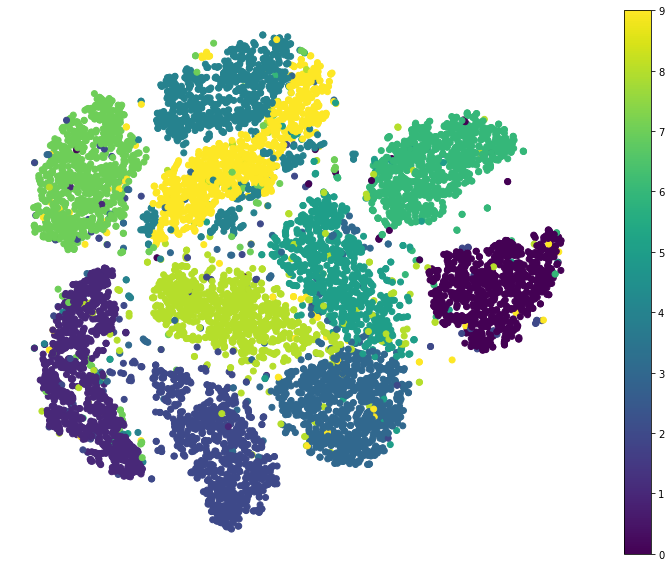

In [20]:
from sklearn.manifold import TSNE
X= TSNE(n_components=2).fit_transform(X_main)
plt.figure(figsize=(13, 10))
plt.scatter(X[:,0],X[:,1],c=y)
plt.axis('off')
plt.colorbar()

# PCA sur les données MINST
## RandomForest sans transformation

In [23]:
y=digits['target'].astype('uint8')
X=digits.data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000)

In [64]:
clf = RandomForestClassifier(n_estimators=100)
start=time.time()
clf.fit(X_train,y_train)
end=time.time()
duree=format(end-start,'.2f')
print("L'execution a pris : {} secondes".format(duree))


L'execution a pris : 52.56 secondes


### Prediction sur la base de test et affichage du taux de classification

In [71]:
y_pred=clf.predict(X_test)
score=metrics.accuracy_score(y_test,y_pred)
print("Nous avons une accuracy de : {}".format(score))

Nous avons une accuracy de : 0.9686


## RandomForest avec reduction des dimensionnalité

In [75]:
pca=PCA(.95)
X_pca=pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=60000, test_size=10000)

In [76]:
clf = RandomForestClassifier(n_estimators=100)
start=time.time()
clf.fit(X_train,y_train)
end=time.time()
duree=format(end-start,'.2f')
print("L'execution a pris : {} secondes".format(duree))

L'execution a pris : 107.81 secondes


In [77]:
y_pred=clf.predict(X_test)
score=metrics.accuracy_score(y_test,y_pred)
print("Nous avons une accuracy de : {}".format(score))

Nous avons une accuracy de : 0.9465


## Softmax sans reduction 


In [78]:
y=digits['target'].astype('uint8')
X=digits.data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000)

In [80]:
clf = LogisticRegression()
start=time.time()
clf.fit(X_train,y_train)
end=time.time()
duree=format(end-start,'.2f')
print("L'execution a pris : {} secondes".format(duree))
y_pred=clf.predict(X_test)
score=metrics.accuracy_score(y_test,y_pred)
print("Nous avons une accuracy de : {}".format(score))

L'execution a pris : 29.90 secondes
Nous avons une accuracy de : 0.921


## Test avec PCA

In [81]:
pca=PCA(.95)
X_pca=pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=60000, test_size=10000)

In [82]:
clf = LogisticRegression()
start=time.time()
clf.fit(X_train,y_train)
end=time.time()
duree=format(end-start,'.2f')
print("L'execution a pris : {} secondes".format(duree))
y_pred=clf.predict(X_test)
score=metrics.accuracy_score(y_test,y_pred)
print("Nous avons une accuracy de : {}".format(score))

L'execution a pris : 9.03 secondes
Nous avons une accuracy de : 0.9131
